<font size=5 color='blue'>
Simple examples to ilustrate the concepts of underfitten and overfitting

In [1]:
import numpy as np
import random

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt
%matplotlib inline

np.random.seed(1)

<font size=4>
The samples described with the coordinates $(X, Y)$ are generated using the following equation: $$ $$  

$$ Y = g(X)+\eta$$

$g(X)$ is the function to generate the samples, $\eta$ is a noise function defined with normal distribution.

To model the correlations between the vairable $X$ and $Y$, we will consider a family of functions $F_\alpha(W_\alpha,X)$ that depend on the parameters $W_\alpha=(w_{\alpha1}, w_{\alpha2}, w_{\alpha3}, ...)$. 


# Getting samples

## Modeling the samples

In [2]:
# Number of samples
N_samples=20

#N_samples equally spaced values are generated from 0.05 to 0.95
x=np.linspace(0.05,0.95,N_samples)

# Gaussian uncorrelated noise
# We generate N_samples values at random wint a normal distribution

sigma_samples=0.3    #Maximal noise amplitud
s = sigma_samples*np.random.randn(N_samples)

# polynomial of order 10
y= 2*x - 5*x**5 + 15*x**10 + s

samples = []
for i in range(N_samples) :
    samples.append((x[i], y[i]))


### We consider a function to generate the samples

In [3]:
def split_samples(samples, val_ratio=0.2, shuffle=True):
    
    if shuffle==True:
        random.shuffle(samples)
             
    learn_ratio = int((1.0-val_ratio)*len(samples))
    learn = samples[0:learn_ratio]
    val = samples[learn_ratio:]

    learn_x=[]
    learn_y=[]
    for i in range(len(learn)):
        learn_x.append(learn[i][0])
        learn_y.append(learn[i][1])
    
    x_learn = np.array(learn_x)
    y_learn = np.array(learn_y)

    val_x=[]
    val_y=[]
    for i in range(len(val)):
        val_x.append(val[i][0])
        val_y.append(val[i][1])
    
    x_val = np.array(val_x)
    y_val = np.array(val_y)
    
    return x_learn, y_learn, x_val, y_val


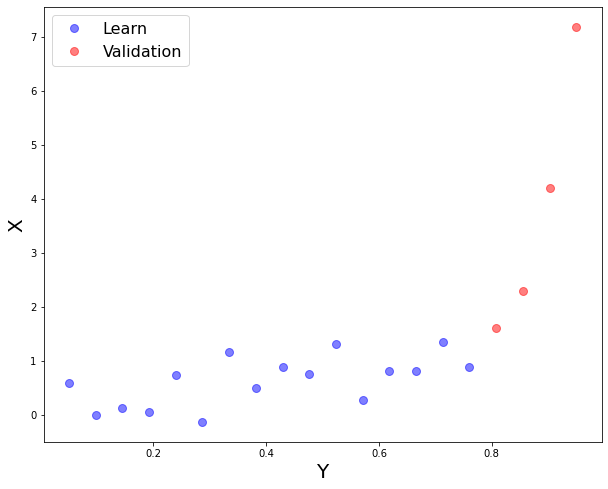

In [4]:
val_ratio = 0.2
x_learn, y_learn, x_val, y_val = split_samples(samples, val_ratio=val_ratio, shuffle=False)

fig = plt.figure(figsize=(10, 8))
plt.ylabel('X', size=20)
plt.xlabel('Y', size=20)
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)

p1=plt.plot(x_learn, y_learn, "o", ms=8, alpha=0.5, label='Training', color='blue')
p1=plt.plot(x_val, y_val, "o", ms=8, alpha=0.5, label='Training', color='red')
plt.legend(['Learn', 'Validation'], loc='upper left', prop={'size': 16})


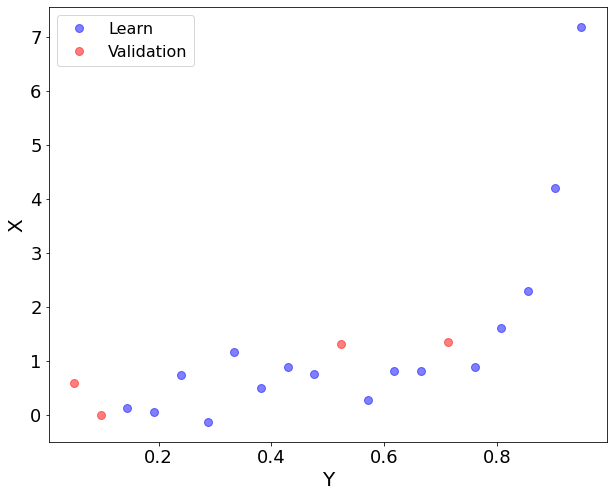

In [5]:
val_ratio = 0.2
x_learn, y_learn, x_val, y_val = split_samples(samples, val_ratio=val_ratio, shuffle=True)

fig = plt.figure(figsize=(10, 8))
plt.ylabel('X', size=20)
plt.xlabel('Y', size=20)
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)

p1=plt.plot(x_learn, y_learn, "o", ms=8, alpha=0.5, label='Training', color='blue')
p1=plt.plot(x_val, y_val, "o", ms=8, alpha=0.5, label='Training', color='red')

plt.legend(['Learn', 'Validation'], loc='upper left', prop={'size': 16})

In [6]:
def fit_poly(xplot, x_learn, y_learn, x_val, y_val, poly_degree):

    fig = plt.figure(figsize=(10, 8))
    plt.ylabel('Y', size=20)
    plt.xlabel('X', size=20)
    plt.rc('xtick', labelsize=18) 
    plt.rc('ytick', labelsize=18)


    # plot teh samples:
    p1=plt.plot(x_learn, y_learn, "o", ms=8, alpha=0.5, label='Training', color='blue')
    p1=plt.plot(x_val, y_val, 'o', ms=10, alpha=0.5, label='test data', color='red')

    # Polynomial Regression
    poly = PolynomialFeatures(degree=poly_degree)

    # Construct polynomial features
    X = poly.fit_transform(x_learn[:,np.newaxis])
    clf = linear_model.LinearRegression()
    clf.fit(X,y_learn)

    Xplot=poly.fit_transform(xplot[:,np.newaxis])
    poly_plot=plt.plot(xplot, clf.predict(Xplot), label='Poly', color='green')
    
    plt.legend(['Learn', 'Validation', 'Fitting function'], loc='upper left', prop={'size': 16})

## Fit with a Linear Regression

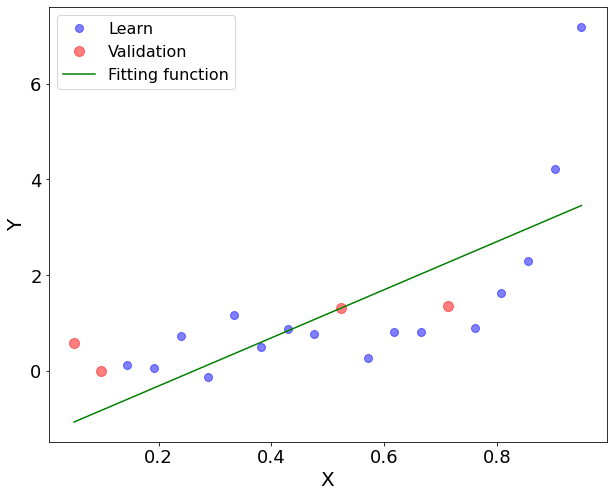

In [7]:
xplot=np.linspace(0.05,0.95,200)

fit_poly(xplot, x_learn, y_learn, x_val, y_val, poly_degree=1)

##  Polynomial Regression: seconth order

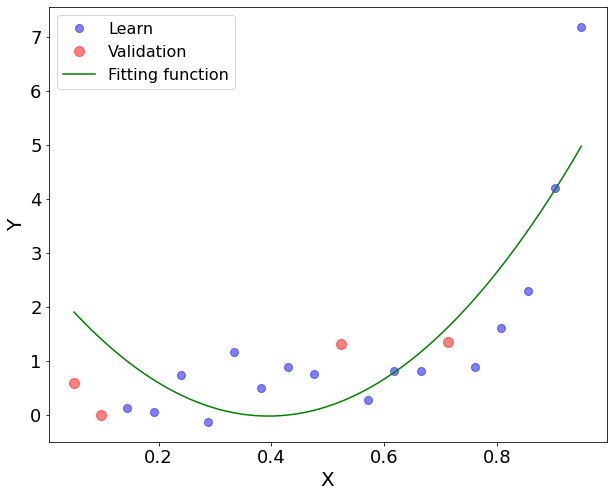

In [8]:
fit_poly(xplot, x_learn, y_learn, x_val, y_val, poly_degree=2)

##  Polynomial Regression: third order

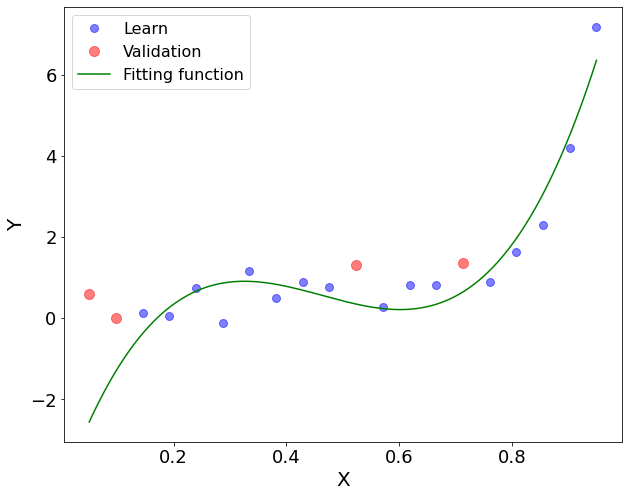

In [9]:
fit_poly(xplot, x_learn, y_learn, x_val, y_val, poly_degree=3)

##  Polynomial Regression: fifth order

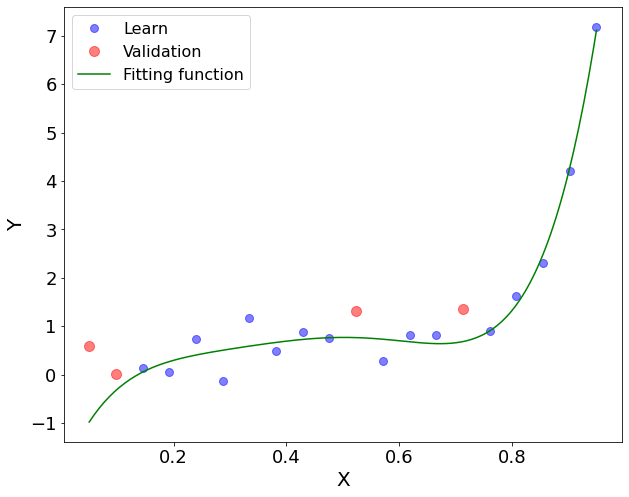

In [10]:
fit_poly(xplot, x_learn, y_learn, x_val, y_val, poly_degree=5)

##  Polynomial Regression: tenth order

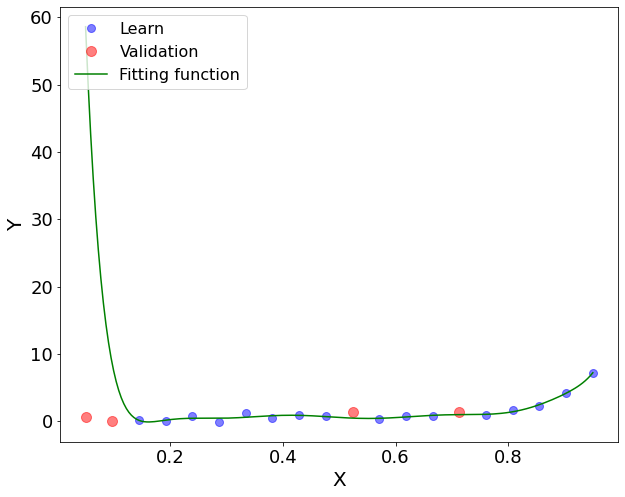

In [11]:
fit_poly(xplot, x_learn, y_learn, x_val, y_val, poly_degree=10)

##  Polynomial Regression: eleventh order

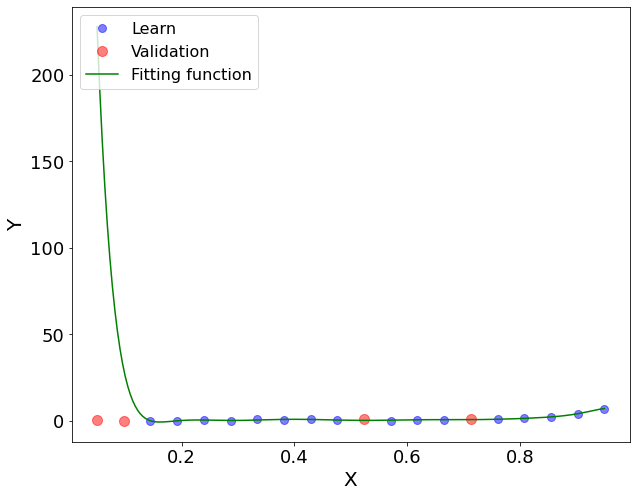

In [12]:
fit_poly(xplot, x_learn, y_learn, x_val, y_val, poly_degree=11)